https://www.kaggle.com/code/alexandrepetit881234/ny-taxi-traffic-eda

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,timestamp,value
0,0,2014-07-01 00:00:00,10844
1,1,2014-07-01 00:30:00,8127
2,2,2014-07-01 01:00:00,6210
3,3,2014-07-01 01:30:00,4656
4,4,2014-07-01 02:00:00,3820


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month
df['day'] = df.timestamp.dt.day
df['day_of_week'] = df.timestamp.dt.dayofweek + 1
df['hour'] = df.timestamp.dt.hour
#df['hour'] += df.timestamp.dt.minute / 60
df.head()

,timestamp,value,year,month,day,hour,day_of_week
0,2014-07-01 00:00:00,10844,2014,7,1,0,2
1,2014-07-01 00:30:00,8127,2014,7,1,0,2
2,2014-07-01 01:00:00,6210,2014,7,1,1,2
3,2014-07-01 01:30:00,4656,2014,7,1,1,2
4,2014-07-01 02:00:00,3820,2014,7,1,2,2


In [9]:
df['day_of_week'] = df.timestamp.dt.dayofweek + 1

In [11]:
df['is_weekend'] = df.day_of_week.map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1})
df.head()

,timestamp,value,year,month,day,hour,day_of_week,is_weekend
0,2014-07-01 00:00:00,10844,2014,7,1,0,2,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,2,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,2,0
3,2014-07-01 01:30:00,4656,2014,7,1,1,2,0
4,2014-07-01 02:00:00,3820,2014,7,1,2,2,0


# Usage by Hour

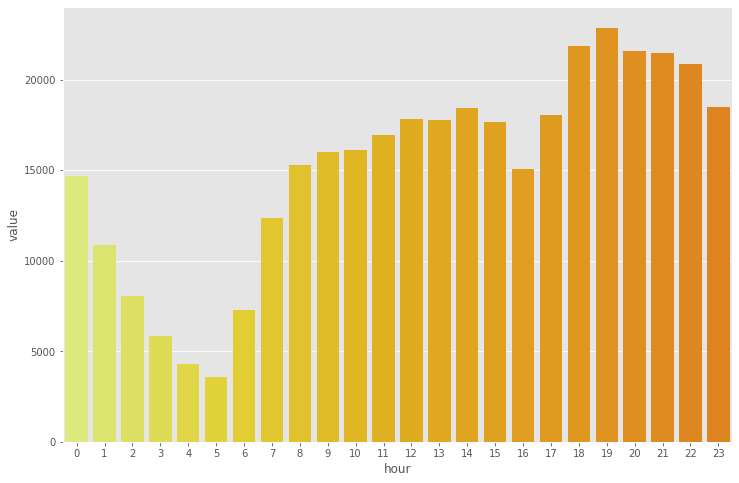

In [12]:
plt.figure(figsize=(12,8))

daily = df.groupby(['hour', 'day_of_week'])['value'].mean().reset_index()

sns.barplot(data=daily, x='hour', y='value', ci=None, palette='Wistia')
plt.show()

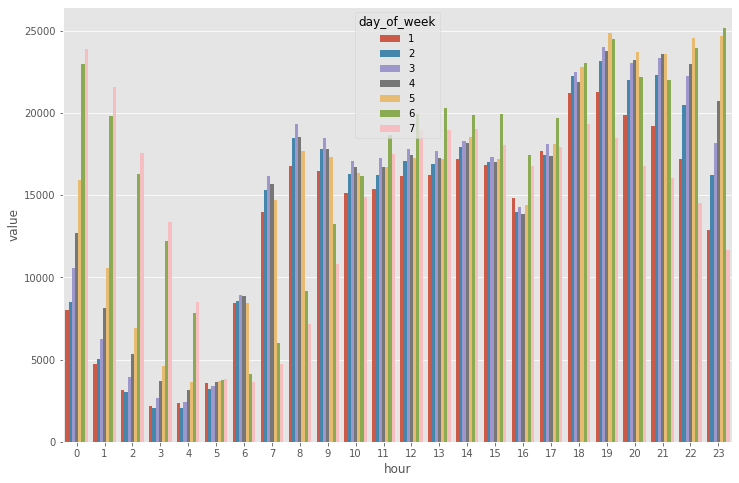

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(data=daily, x='hour', y='value', hue='day_of_week')
plt.show()

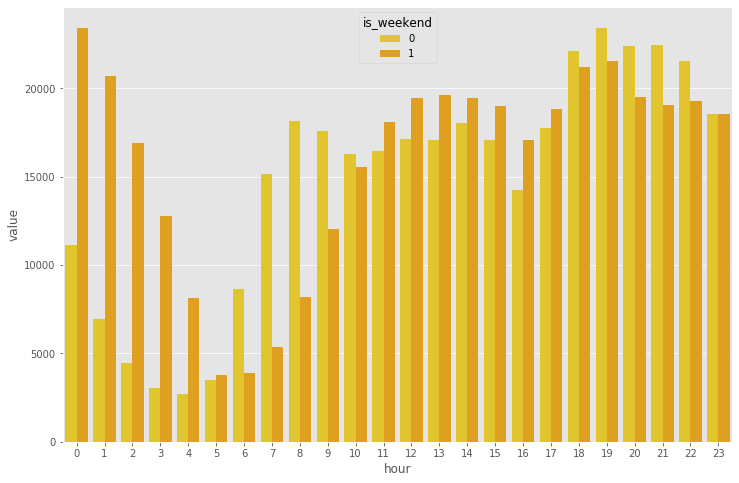

In [14]:
weekend = df.groupby(['hour', 'is_weekend'])['value'].mean().reset_index()

plt.figure(figsize=[12,8])
sns.barplot(data=weekend, x='hour', y='value', hue='is_weekend', palette='Wistia')
plt.show()

Conclusion :
    
    The taxi traffic in New York follow the same patterns than many other city.  

a few quite hours during the night  
busy traffic during daytime  
however, there is no clear reduction in the traffic during the middle of the day  
during the weekend, people start to take taxi later in the day and keeps calling them even late at night 

In [15]:
df.year.value_counts()

2014    8832
2015    1488
Name: year, dtype: int64

# Finding the Anomalies

In [17]:
hour_min = df.groupby('hour')['value'].min().reset_index()
hour_max = df.groupby('hour')['value'].max().reset_index()
hour_std = df.groupby('hour')['value'].std().reset_index()
hour_mean = df.groupby('hour')['value'].mean().reset_index()

In [22]:
hour_std.columns = ['hour', 'std']

In [23]:
hour_mean.columns = ['hour', 'mean']
hour_stat = hour_mean.copy()
hour_stat['std'] = hour_std['std']
hour_stat

,hour,mean,std
0,0,14642.144186,6743.171463
1,1,10858.465116,7106.616858
2,2,8010.365116,6231.954314
3,3,5802.430233,4868.045296
4,4,4264.090698,2984.294096
5,5,3583.472093,1001.400899
6,6,7294.988372,3238.220043
7,7,12390.241860,5577.346008
8,8,15337.730233,5687.683915
9,9,16021.172093,3859.084478


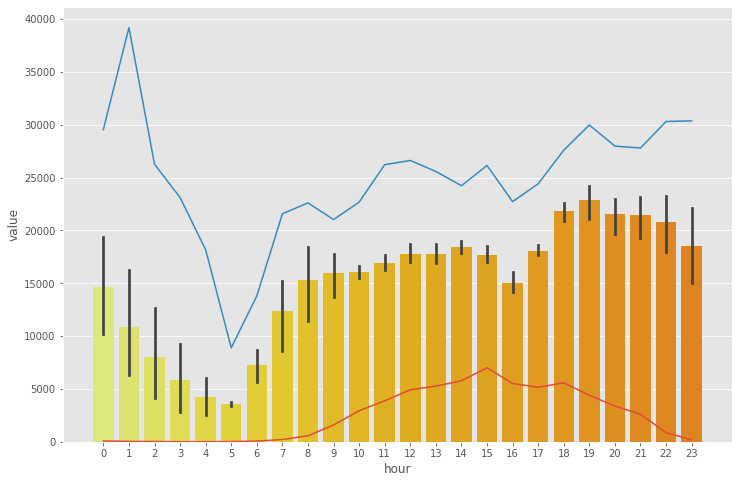

In [24]:
plt.figure(figsize=(12,8))

sns.barplot(data=daily, x='hour', y='value', palette='Wistia')
sns.lineplot(data=hour_min, x='hour', y='value')
sns.lineplot(data=hour_max, x='hour', y='value')

plt.show()

In [30]:
df

,timestamp,value,year,month,day,hour,day_of_week,is_weekend
0,2014-07-01 00:00:00,10844,2014,7,1,0,2,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,2,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,2,0
3,2014-07-01 01:30:00,4656,2014,7,1,1,2,0
4,2014-07-01 02:00:00,3820,2014,7,1,2,2,0
...,...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,2015,1,31,21,6,1
10316,2015-01-31 22:00:00,25721,2015,1,31,22,6,1
10317,2015-01-31 22:30:00,27309,2015,1,31,22,6,1
10318,2015-01-31 23:00:00,26591,2015,1,31,23,6,1


In [25]:
df[df.value > 30000]

,timestamp,value,year,month,day,hour,day_of_week,is_weekend
3261,2014-09-06 22:30:00,30313,2014,9,6,22,6,1
3262,2014-09-06 23:00:00,30373,2014,9,6,23,6,1
5954,2014-11-02 01:00:00,39197,2014,11,2,1,7,1
5955,2014-11-02 01:30:00,35212,2014,11,2,1,7,1
8834,2015-01-01 01:00:00,30236,2015,1,1,1,4,0


In [26]:
df[df.value < 1000]

,timestamp,value,year,month,day,hour,day_of_week,is_weekend
10077,2015-01-26 22:30:00,866,2015,1,26,22,1,0
10078,2015-01-26 23:00:00,297,2015,1,26,23,1,0
10079,2015-01-26 23:30:00,189,2015,1,26,23,1,0
10080,2015-01-27 00:00:00,109,2015,1,27,0,2,0
10081,2015-01-27 00:30:00,80,2015,1,27,0,2,0
10082,2015-01-27 01:00:00,40,2015,1,27,1,2,0
10083,2015-01-27 01:30:00,39,2015,1,27,1,2,0
10084,2015-01-27 02:00:00,26,2015,1,27,2,2,0
10085,2015-01-27 02:30:00,32,2015,1,27,2,2,0
10086,2015-01-27 03:00:00,8,2015,1,27,3,2,0


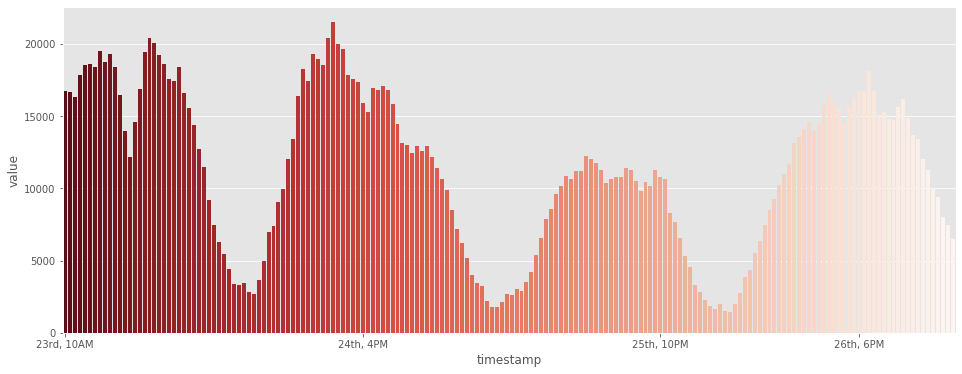

In [29]:
plt.figure(figsize=(16,6))

sns.barplot(data=xmas, x='timestamp', y='value', palette='Reds_r')
plt.xticks(ticks=[0,60,120,160], labels=['23rd, 10AM', '24th, 4PM', '25th, 10PM', '26th, 6PM'])
plt.show()

In [35]:
df = pd.read_csv('dataset.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB
None


In [32]:
# check the timestamp format and frequence 
print(df['timestamp'].head(10))

0   2014-07-01 00:00:00
1   2014-07-01 00:30:00
2   2014-07-01 01:00:00
3   2014-07-01 01:30:00
4   2014-07-01 02:00:00
5   2014-07-01 02:30:00
6   2014-07-01 03:00:00
7   2014-07-01 03:30:00
8   2014-07-01 04:00:00
9   2014-07-01 04:30:00
Name: timestamp, dtype: datetime64[ns]


In [33]:
# check the temperature mean
print(df['value'].mean())

15137.569379844961


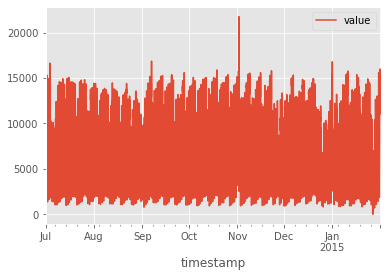

In [38]:
#change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
# change fahrenheit to °C (temperature mean= 71 -> fahrenheit)
df['value'] = (df['value'] - 32) * 5/9
# plot the data
df.plot(x='timestamp', y='value')

In [39]:
# the hours and if it's night or day (7:00-22:00)
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [40]:
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.01

In [41]:
# time with int to plot easily
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

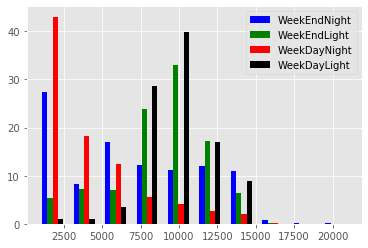

In [42]:
# creation of 4 distinct categories that seem useful (week end/day week & night/day)
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')

plt.legend()
plt.show()

In [48]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Take useful feature and standardize them
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [46]:
data

,0,1
0,1.511792,-0.571621
1,1.663090,-0.562428
2,1.714955,-0.568541
3,1.801491,-0.563283
4,1.793159,-0.573052
...,...,...
10315,-1.496584,1.141219
10316,-1.609995,1.125065
10317,-1.698425,1.119693
10318,-0.927525,1.292867


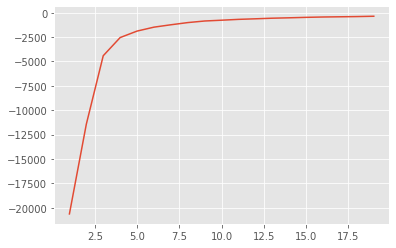

In [49]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [50]:
# Not clear for me, I choose 15 centroids arbitrarily and add these data to the central dataframe
df['cluster'] = kmeans[14].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

8     1344
11    1126
1     1046
3      857
9      855
7      704
4      619
5      592
10     591
14     557
0      532
6      496
12     419
2      355
13     227
Name: cluster, dtype: int64

In [51]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories,cluster,principal_feature1,principal_feature2
0,2014-07-01 00:00:00,6006.666667,0,0,1,1,14041728,2,3,1.511792,-0.571621
1,2014-07-01 00:30:00,4497.222222,0,0,1,1,14041746,2,3,1.663090,-0.562428
2,2014-07-01 01:00:00,3432.222222,1,0,1,1,14041764,2,3,1.714955,-0.568541
3,2014-07-01 01:30:00,2568.888889,1,0,1,1,14041782,2,3,1.801491,-0.563283
4,2014-07-01 02:00:00,2104.444444,2,0,1,1,14041800,2,3,1.793159,-0.573052
...,...,...,...,...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,13687.777778,21,1,5,0,14227398,1,2,-1.496584,1.141219
10316,2015-01-31 22:00:00,14271.666667,22,1,5,0,14227416,1,2,-1.609995,1.125065
10317,2015-01-31 22:30:00,15153.888889,22,1,5,0,14227434,1,2,-1.698425,1.119693
10318,2015-01-31 23:00:00,14755.000000,23,0,5,0,14227452,0,11,-0.927525,1.292867


In [52]:
data

,0,1
0,1.511792,-0.571621
1,1.663090,-0.562428
2,1.714955,-0.568541
3,1.801491,-0.563283
4,1.793159,-0.573052
...,...,...
10315,-1.496584,1.141219
10316,-1.609995,1.125065
10317,-1.698425,1.119693
10318,-0.927525,1.292867


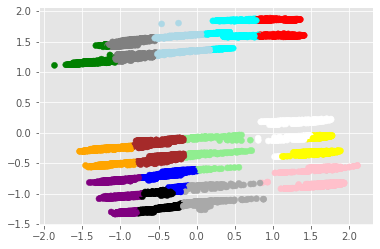

In [53]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()
